In [4]:
%run selbal.py

In [65]:
hiv_df = pd.read_csv("HIV.csv")
hiv_df = hiv_df.drop(columns=["MSM"])
hiv_df["HIV_Status"] = ["CRC" if c == "Pos" else c for c in hiv_df["HIV_Status"]]

table = hiv_df.drop(columns=["HIV_Status"])
table = table.set_index('Unnamed: 0')

table_repl = pd.DataFrame(multiplicative_replacement(table.values),
                      index=table.index,
                      columns=table.columns)

columns = table_repl.columns
def calc_count(row):
    min_ab = min(row)
    to_mult = 1 / min_ab
    for col in columns:
        row[col] = round(row[col]*to_mult)
    return row

table_repl = table_repl.apply(calc_count,axis=1)

grouping_ser=hiv_df["HIV_Status"]

In [71]:
hiv_df = pd.read_csv("HIV.csv")
hiv_df = hiv_df.drop(columns=["MSM"])
hiv_df["HIV_Status"] = ["CRC" if c == "Pos" else c for c in hiv_df["HIV_Status"]]

table = hiv_df.drop(columns=["HIV_Status"])
table = table.set_index('Unnamed: 0')

columns = table.columns
def calc_count(row):
    for col in columns:
        row[col] = row[col]+1
    return row

table_repl = table_repl.apply(calc_count,axis=1)

grouping_ser=hiv_df["HIV_Status"]

In [72]:
table_repl.head()

,g_Prevotella,g_Faecalibacterium,g_Bacteroides,f_Lachnospiraceae_g_unclassified,g_Succinivibrio,g_Alloprevotella,f_Ruminococcaceae_g_unclassified,g_Blautia,g_Parabacteroides,g_Lachnospira,...,g_Anaeroplasma,f_Defluviitaleaceae_g_Incertae_Sedis,c_Alphaproteobacteria_g_unclassified,g_Butyricimonas,f_Porphyromonadaceae_g_unclassified,g_Acidaminococcus,g_Collinsella,g_Solobacterium,o_Clostridiales_g_unclassified,o_NB1-n_g_unclassified
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Sample_001,71.0,309.0,1739.0,346.0,3.0,3.0,760.0,178.0,126.0,61.0,...,3.0,7.0,3.0,16.0,59.0,3.0,6.0,3.0,12.0,3.0
Sample_002,1195.0,407.0,1940.0,205.0,1776.0,3.0,276.0,109.0,116.0,31.0,...,3.0,2.0,3.0,10.0,3.0,31.0,2.0,3.0,3.0,3.0
Sample_003,2277.0,554.0,1250.0,498.0,3.0,3.0,123.0,219.0,173.0,84.0,...,3.0,2.0,3.0,3.0,3.0,3.0,11.0,3.0,2.0,3.0
Sample_004,2206.0,1009.0,80.0,237.0,3.0,251.0,587.0,96.0,92.0,26.0,...,3.0,4.0,214.0,4.0,3.0,6.0,2.0,3.0,77.0,3.0
Sample_005,1871.0,212.0,31.0,419.0,3.0,188.0,400.0,99.0,35.0,79.0,...,3.0,4.0,3.0,3.0,3.0,3.0,7.0,3.0,76.0,272.0


In [73]:
grouping_ser.head()

0    CRC
1    CRC
2    CRC
3    Neg
4    Neg
Name: HIV_Status, dtype: object

Number of fold: 1
Optimal balance for 2...
Selecting further features...
Number of fold: 2
Optimal balance for 2...
Selecting further features...
Number of fold: 3
Optimal balance for 2...
Selecting further features...
Number of fold: 4
Optimal balance for 2...
Selecting further features...
Number of fold: 5
Optimal balance for 2...
Selecting further features...
Elapsed time while CV: 109.53230953216553


/home/kalre1/microbiome-data/bin/selbal/selbal.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  joined_3['Occurance'] = joined_3[cols].gt(0).sum(axis=1) + joined_3[cols].lt(0).sum(axis=1)


Selected cmop size (max mean): 6
Optimal balance for 2...
Selecting further features...
Positive set: ['g_RC9_gut_group', 'g_Elusimicrobium', 'g_Dialister', 'f_vadinBB60_g_unclassified', 'f_Ruminococcaceae_g_Incertae_Sedis']
Negative set: ['k_Bacteria_g_unclassified']
Elapsed time whole: 124.84681129455566


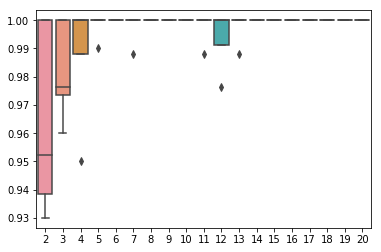

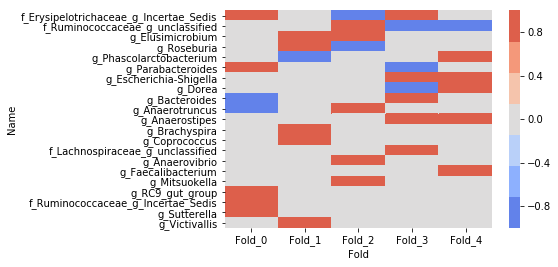

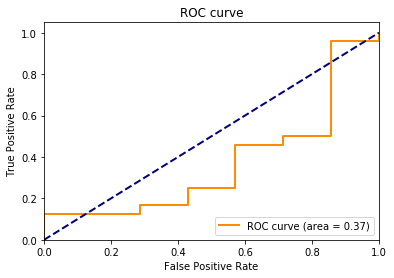

In [74]:
cv_with_test("", "Metaphlan", "", folds= 5, threshold = -1, max_comp = 20,
             percent=30, table_repl = table_repl, grouping_ser=grouping_ser)